In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('retail.csv')

In [157]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,"2,75",17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
InvoiceNo      54214 non-null object
StockCode      54214 non-null object
Description    54080 non-null object
Quantity       54214 non-null int64
InvoiceDate    54214 non-null object
UnitPrice      54214 non-null object
CustomerID     40643 non-null float64
Country        54214 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ MB


In [5]:
#Считаем средний % пропусков

(data.isna().mean()*100).round(2)

InvoiceNo       0.00
StockCode       0.00
Description     0.25
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     25.03
Country         0.00
dtype: float64

In [6]:
#Строки в которых отсутствуют Description я бы дропнул, учитывая их незначительную часть
data.dropna(subset=['Description'], inplace=True)

In [7]:
#Пропуски в поле CustomerID удалить не могу, так как их 25%. Будем думать чем их заполнить. 
data[data.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
158,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,12/1/10 14:32,"2,51",NaN,United Kingdom
159,536544,21870,I CAN ONLY PLEASE ONE PERSON MUG,1,12/1/10 14:32,"3,36",NaN,United Kingdom
160,536544,21879,HEARTS GIFT TAPE,1,12/1/10 14:32,"1,66",NaN,United Kingdom
161,536544,21928,JUMBO BAG SCANDINAVIAN PAISLEY,1,12/1/10 14:32,"4,21",NaN,United Kingdom
162,536544,22069,BROWN PIRATE TREASURE CHEST,1,12/1/10 14:32,"3,36",NaN,United Kingdom
...,...,...,...,...,...,...,...,...
54161,581498,48138,DOORMAT UNION FLAG,1,12/9/11 10:26,"14,13",NaN,United Kingdom
54162,581498,82482,WOODEN PICTURE FRAME WHITE FINISH,4,12/9/11 10:26,"4,96",NaN,United Kingdom
54163,581498,84032A,CHARLIE+LOLA PINK HOT WATER BOTTLE,4,12/9/11 10:26,"5,79",NaN,United Kingdom
54164,581498,84558a,3D DOG PICTURE PLAYING CARDS,1,12/9/11 10:26,"5,79",NaN,United Kingdom


In [8]:
#Также найдено, что в столбце UnitPrice есть значения равные 0. Также в столбце Description есть значения вида: Manual, Discount, Found и т.д. 
#Все эти значения я решаю максимально дропнуть. 

#data[data['Description'].str.contains(r'[a-z]')].head(50)

data.drop(data[data['UnitPrice'] == '0'].index, inplace=True)

In [9]:
data.drop(data[data['StockCode'].str.isalpha()].index, inplace=True)

In [10]:
#С пропусками, которые в столбце CustomerID - я так и не придумал решениям чем их заполнить - ЖДУ ОБРАТНОЙ СВЯЗИ ОТ ЭКСПЕРТОВ
#Поэтому удаляю их...

data.dropna(subset=['CustomerID'], inplace=True)

In [11]:
#По итогу обрабоки данных имеем 40464 заполненных значений по всем столбцам
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40464 entries, 0 to 54213
Data columns (total 8 columns):
InvoiceNo      40464 non-null object
StockCode      40464 non-null object
Description    40464 non-null object
Quantity       40464 non-null int64
InvoiceDate    40464 non-null object
UnitPrice      40464 non-null object
CustomerID     40464 non-null float64
Country        40464 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 2.8+ MB


In [12]:
#Добавлю столбец Total в котором будет хранить итоговое значение по заказу Quantity*UnitPrice
#Но сначала нужно UnitPrice перевести в float

def subs(col):
    return col.replace(',','.')

In [13]:
data['UnitPrice'] = data['UnitPrice'].apply(subs)

In [14]:
data['UnitPrice'] = data.UnitPrice.astype(float)

In [15]:
def total(col):
    return col['Quantity']*col['UnitPrice']

In [16]:
data['Total'] = data.apply(total,axis=1)

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,5.95,13047.0,United Kingdom,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,4.95,13047.0,United Kingdom,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,2.75,17850.0,United Kingdom,22.00


In [18]:
#Больше всего товаров было закуплено из UK, меньше всего Бахрейна

data.groupby(['Country']).agg('count')['Description'].sort_values(ascending=False)

Country
United Kingdom          36106
Germany                   915
France                    840
EIRE                      719
Spain                     248
Netherlands               230
Belgium                   201
Switzerland               176
Portugal                  141
Australia                 130
Norway                     99
Channel Islands            81
Italy                      77
Finland                    70
Cyprus                     60
Austria                    48
Sweden                     47
Poland                     44
Denmark                    34
Japan                      33
Singapore                  24
USA                        23
Unspecified                21
Israel                     20
Iceland                    15
Greece                     14
Canada                     13
Malta                       8
Lithuania                   6
European Community          5
United Arab Emirates        5
RSA                         4
Brazil                      3
Cz

In [173]:
uk = data[data['Country'] == 'United Kingdom']

uk.groupby(['Description'])['Description'].agg('count').sort_values(ascending=False)

Description
WHITE HANGING HEART T-LIGHT HOLDER    209
REGENCY CAKESTAND 3 TIER              153
JUMBO BAG RED RETROSPOT               147
LUNCH BAG RED RETROSPOT               124
ASSORTED COLOUR BIRD ORNAMENT         123
                                     ... 
PINK FLOCK GLASS CANDLEHOLDER           1
PINK FLOCK PHOTO FRAME                  1
CHARLOTTE BAG ALPHABET  DESIGN          1
PINK GINGHAM CAT WITH SCARF             1
PINK/PURPLE RETRO RADIO                 1
Name: Description, Length: 3062, dtype: int64

In [137]:
#data.to_csv('retail_clean.csv')

In [24]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Year,Month
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010,December
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85,2010,December
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85,2010,December
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00,2010,December


In [19]:
#Конвертируем столбец InvoiceDate в datetime

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [20]:
#Вытаскиваем год в отдельный столбец

data['Year'] = data['InvoiceDate'].dt.year

In [21]:
data['Total'] = data['Total'].round(2)

In [22]:
#Вытаскиваем месяц в отдельный столбец

data['Month'] = data['InvoiceDate'].dt.month_name(locale='English')

In [23]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Year,Month
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010,December
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85,2010,December
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85,2010,December
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00,2010,December


In [190]:
data['Month'].unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [25]:
#Добавил столбец с Кварталом

def quarter(col):
    if (col=='January') | (col=='February') | (col=='March'):
        return '1st'
    elif (col=='April') | (col=='May') | (col=='June'):
        return '2nd'
    elif (col=='July') | (col=='August') | (col=='September'):
        return '3rd'
    else:
        return '4th'

In [26]:
#Добавил столбец с Кварталом

data['Quarter'] = data['Month'].apply(quarter)

In [250]:
sotred_data = data.sort_values('InvoiceDate', ascending=True)

In [27]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Year,Month,Quarter
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,4th
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010,December,4th
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85,2010,December,4th
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85,2010,December,4th
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00,2010,December,4th


In [28]:
data.to_csv('retail_clean.csv')
#sotred_data.to_excel('ret.xlsx')

In [252]:
#Сводная таблица

sotred_data.pivot_table(index=['Year','Quarter','Month'],columns='Country',values='Description',aggfunc='count',fill_value=0)

Country                 Australia  Austria  Bahrain  Belgium  Brazil  Canada  \
Year Quarter Month                                                             
2010 4th     December           4        1        0       10       0       0   
2011 1st     February           8        3        0       12       0       0   
             January           16        0        0        1       0       0   
             March             14        0        0       18       0       1   
     2nd     April              0        4        0       13       3       0   
             June              21        0        0       20       0       6   
             May                9        8        1       15       0       0   
     3rd     August            15       12        0       27       0       0   
             July              17        7        0       14       0       6   
             September         11        0        0       19       0       0   
     4th     December           0        0        0       11       0       0   
             November           3        9        0       21       0       0   
             October           12        4        0       20       0       0   

Country                 Channel Islands  Cyprus  Czech Republic  Denmark  ...  \
Year Quarter Month                                                        ...   
2010 4th     December                 3       9               0        3  ...   
2011 1st     February                 3      15               1        1  ...   
             January                  5       1               0        0  ...   
             March                   17      10               0        1  ...   
     2nd     April                    4       0               0        0  ...   
             June                    11       6               0        9  ...   
             May                      5       0               0        3  ...   
     3rd     August                  12       0               0        0  ...   
             July                     0       0               0        1  ...   
             September                4       0               0        5  ...   
     4th     December                 1       0               0        1  ...   
             November                 7       7               0        7  ...   
             October                  9      12               1        3  ...   

Country                 Portugal  RSA  Singapore  Spain  Sweden  Switzerland  \
Year Quarter Month                                                             
2010 4th     December          9    0          0      9       8            7   
2011 1st     February          5    0          0      7       1            8   
             January          12    0          6     40       2           17   
             March            11    0          0     25       4            4   
     2nd     April             8    0          5      5       2            9   
             June              5    0          0     16       3           14   
             May               6    0          0      8       3           14   
     3rd     August            3    0          0     28       0           32   
             July              9    0          8     21       8           12   
             September         8    0          0     21       4           22   
     4th     December         15    0          0      9       0            0   
             November         14    0          0     29       9           19   
             October          36    4          5     30       3           18   

Country                 USA  United Arab Emirates  United Kingdom  Unspecified  
Year Quarter Month                                                              
2010 4th     December     0                     0            2459            0  
2011 1st     February     0                     3            1833            0  
             January      0                     0         

In [216]:
#Сводная таблица

data_by_year = data.pivot_table(index=['Year','Quarter'],columns='Month',values='Description',aggfunc='count',fill_value=0)

In [230]:
data_by_year.style.highlight_max(color='lightgreen')

In [30]:
import matplotlib 

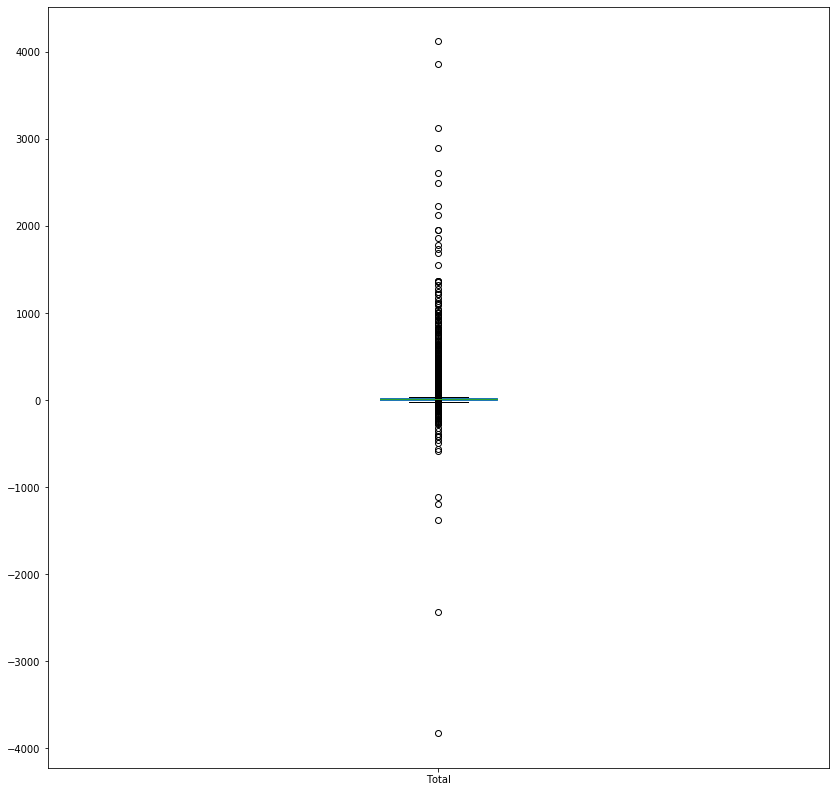

In [41]:
#Выбросы по значению Total
data['Total'].plot(kind='box',vert=True,figsize=(14,14))

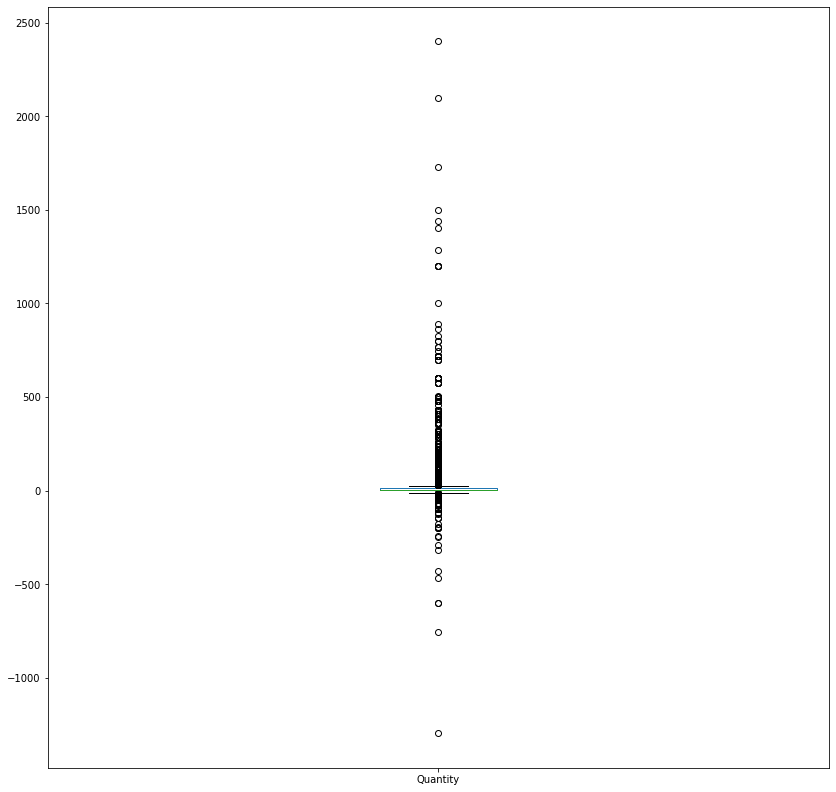

In [42]:
#Выбросы по значению Total
data['Quantity'].plot(kind='box',vert=True,figsize=(14,14))

In [43]:
data.corr()

,Quantity,UnitPrice,CustomerID,Total,Year
Quantity,1.000000,-0.078967,-0.021128,0.680534,0.009604
UnitPrice,-0.078967,1.000000,-0.010013,0.072110,-0.010568
CustomerID,-0.021128,-0.010013,1.000000,-0.007371,-0.034548
Total,0.680534,0.072110,-0.007371,1.000000,0.003013
Year,0.009604,-0.010568,-0.034548,0.003013,1.000000
